<p><font size="4">  MOOC: Understanding queues</font></p>
<p><font size="4">  Python simulations</p>
<p><font size="4">  Week IV: Continuous time Markov chains </p>


----------------------------

In this lab, we focus on the simulation of continuous time Markov chains. In the lab of week 2 we have simulated a M/M/1 queue. This week, we are going to study a $M/M/1/K$ queue to illustrate the effects of a finite buffer length. We will compute the loss probability in this model and observe the influence of the load $\rho$ when the capacity $K$ is large. 

-----------------

**1)** Complete the code of the function **MM1K** below. This function generates one trajectory of a $M/M/1/K$ queue. The function returns the instants of events (arrivals or departures), the number of customers in the system at these instants, as well as the number of arrivals and of lost customers. Customers are lost if the buffer is full when they arrive. Default parameters will be set as follows: MMM1K($K=3$, $\lambda = 4$, $\mu = 5$, $N0 = 2$, $Tmax=100$). $\lambda$ and $\mu$ are the arrival and departure rates, $K$ is the maximum number of customers in the system, $N0$ is the initial number of customers, and the evolution of the number of customers in the system is simulated over $[0,Tmax]$. Plot a trajectory of the number of customers in the system against time, obtained after running function **MM1K** with the default parameters.

In [1]:
%matplotlib inline              
from pylab import *          

In [2]:
def MM1K(K=3,lambda_ = 4.,mu = 5.,N0 = 2,Tmax=100):
    N0       = min(N0,K)# enforcing buffer length constraint
    p        = lambda_/(mu+lambda_) # probability that the next event is an arrival when N(t) > 0
    T        = [0]  # list of instants of events (arrivals/departures)
    N        = [N0] # initial number of customers in the system, list of number of customers at arrivals/departures
    losses   = 0    # number of lost clients
    arrivals = 0    
    while T[-1]<Tmax:
        if N[-1]==0:
            # inter-event when N(t)=0:
            tau      = -1./lambda_*log(rand()) 
            event    = 1
        else:
            tau   = -1./(lambda_+mu)*log(rand()) # inter-event when N(t)>0
            event = 2*(rand()<p)-1 # +1 for an arrival, -1 for a departure
        # Unlike in function MM1, when N[-1]==K, if a new client arrives this client is lost 
        # and the number of lost clients is incremented by 1
        if event==1:
            arrivals +=1    # event==1 corresponds to an arrival
            if N[-1]==K:
                ###########################
                # supply value of events and update losses
                # when a customer arrives while N[-1]==K
                event   = 0 
                losses  = losses + 1
                ###########################
        N = N + [N[-1]+event]
        T = T + [T[-1]+tau]

    T    = T[:-1] # event after Tmax is discarded
    N    = N[:-1]
    return array(T),array(N),arrivals,losses

#------------------
T,N,arrivals,losses = MM1K(K=3,lambda_ = 4.,mu = 5.,N0 = 2,Tmax=10**3)
V1 = losses/arrivals

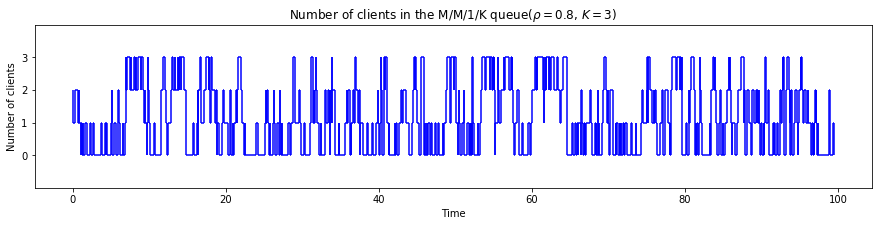

In [3]:
# Plotting the evolution of the number of clients in the system

def step(x,y,Tmax=0,color='b'):
    # plots a step function representing the number
    # of clients in the system at each instant
    if Tmax==0:
        Tmax = max(x)
    x = append(x,[Tmax])  # number of clients
    y = append(y,[y[-1]]) # instants of events
    for k in range(len(x)-1):
        vlines(x[k+1],y[k],y[k+1],color=color)
        hlines(y[k],x[k],x[k+1],color=color)

K=3
T,N,arrivals,losses = MM1K()
rcParams['figure.figsize'] = [15,3]
step(T,N)
xlabel('Time')
ylabel('Number of clients')
lambda_ = 4.
mu = 5.
title('Number of clients in the M/M/1/K queue' 
      +r'($\rho =%g$, $K=%g$)'%(lambda_/mu,K))
axis(ymin=-1,ymax=4)
yticks(range(4), range(4));


**2)** Letting $K$ range from 1 to 11, plot the loss probability for $\lambda = 4$ and for $\lambda = 10$ (and $\mu=5$). Remarks ? Compare it to the theoretical loss probability.

Observe on the curves that when $\rho<1$ ($\lambda=4$), the blocking probability of the $M/M/1/K$ queue tends to 0 as $K$ increases since the system tends to behave as a stable $M/M/1$ queue. 

When $\rho>1$ ($\lambda=10$), the rate of arrivals exceeds that of departures and the corresponding $M/M/1$ queue is unstable. So, even if $K$ is large the loss probability of the $M/M/1/K$ queue does not tend to zero.

The loss probability in a M/M/1/K queue is:
$$
\pi_K=\dfrac{1-\rho}{1-\rho^{K+1}}\rho^K
$$

Clearly, when $\rho<1$, $\pi_K$ tends to 0 as $K$ tends to infinity, whereas $\pi_K$ tends to $(\rho-1)/\rho$ when $\rho>1$ and $K$ tends to infinity.

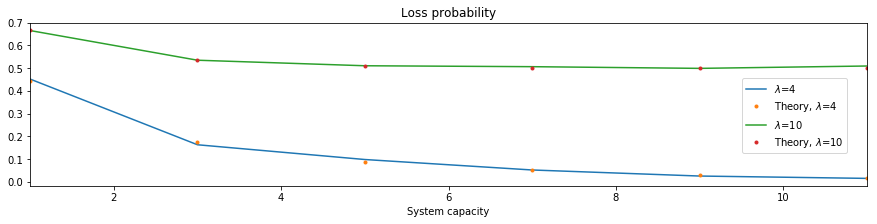

In [4]:
Ks        = arange(1,12,2) # system capacities
Ploss_est = zeros(len(Ks)) # estimated loss probabilities

########################################################
# complete the value returned by function estimate_Ploss
# that estimates the loss probability from the obbserved 
# number of arrivals and number of lost arrivals
def estimate_Ploss(arrivals, losses):
    return losses / arrivals
########################################################
mu = 5
for lambda_ in [4,10]:
    # estimated loss probabilities:
    for index,K in enumerate(Ks):
        T,N,arrivals,losses = \
        MM1K(lambda_=lambda_,K=K,Tmax=10**3)
        Ploss_est[index] = estimate_Ploss(arrivals, losses)
    plot(Ks,Ploss_est,label="$\lambda$=%d"%lambda_)
    # loss probabilities:
    rho = lambda_/mu
    Ploss = (1-rho)/(1-rho**(Ks+1))*rho**Ks 
    plot(Ks,Ploss,'.',label="Theory, $\lambda$=%d"%lambda_)
axis(xmin=1,xmax=11)
xlabel("System capacity")
title("Loss probability")
legend(loc=(.85,.2))

#--------------------------
V2 = estimate_Ploss(2,1) 

# Your answers for the exercise

In [5]:
print("---------------------------\n"
      +"RESULTS SUPPLIED FOR LAB 4:\n"
      +"---------------------------")
results = ("V"+str(k) for k in range(1,3))
for x in results:
    try:
        print(x+" = {0:.2f}".format(eval(x)))
    except:
        print(x+": variable is undefined")   

---------------------------
RESULTS SUPPLIED FOR LAB 4:
---------------------------
V1 = 0.17
V2 = 0.50
